In [ ]:
%pip install pandas matplotlib seaborn nltk textblob wordcloud

In [7]:
%pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.1 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=ff906e5d849eefe6112f78f0df2861b00cc4848b626d8a9ef982073551126d68
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
import langdetect
# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from textblob import TextBlob
from wordcloud import WordCloud

In [3]:
data = pd.read_csv('/kaggle/input/translated-and-cleaned-tweets/Translated.csv')

data

In [12]:
stop_words = set(stopwords.words('english'))

def extract_keywords(text, top_n=10):
    words = word_tokenize(str(text).lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(top_n)

top_keywords_translated = extract_keywords(' '.join(data['Translated'].dropna()), top_n=20)

print("Top Keywords in Translated Content:", top_keywords_translated)

Top Keywords in Translated Content: [('https', 591), ('war', 308), ('putin', 253), ('ukraine', 216), ('russian', 107), ('russia', 101), ('republic', 95), ('moscow', 85), ('weapons', 81), ('ukrainian', 68), ('conflict', 60), ('zelensky', 59), ('kiev', 52), ('mariupol', 52), ('civilians', 51), ('photo', 46), ('peace', 43), ('moldova', 43), ('march', 39), ('people', 37)]


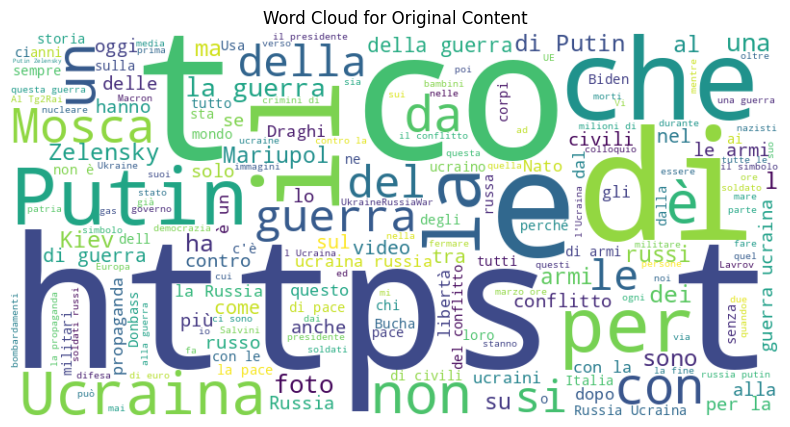

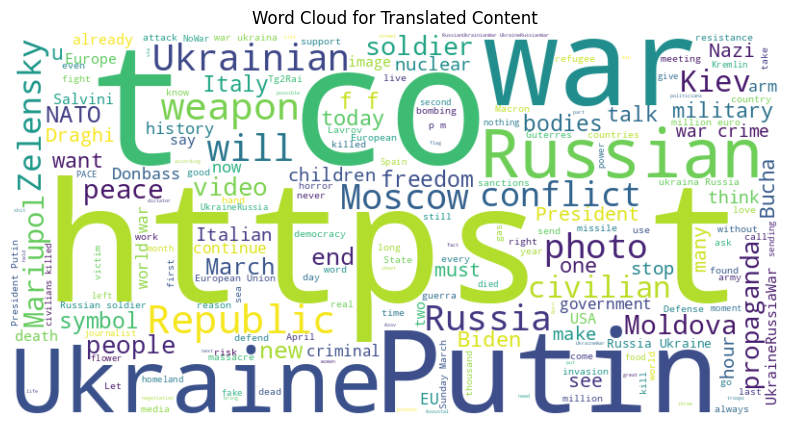

In [13]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(' '.join(data['Content'].dropna()), "Word Cloud for Original Content")
plot_wordcloud(' '.join(data['Translated'].dropna()), "Word Cloud for Translated Content")

In [14]:
filtered_data = data

In [16]:
filtered_data

,Unnamed: 0.1,Unnamed: 0,ID,URL,Type,Label,Content,Image_Name,Translated
0,0,0,1498022438398877704,https://twitter.com/manuela_carloni/status/149...,tweet,1,Dopo aver hackerato la tv di Stato sostituendo...,1498022438398877704.jpg,After hacking the state TV replacing propagand...
1,2,2,1497887473862467584,https://twitter.com/barbarameletto/status/1497...,tweet,2,#flowers #lovers\nFate l'amore non fate la gue...,1497887473862467584.jpg,#flowers #lovers Make love don't make war. Mar...
2,3,3,1497838543619645441,https://twitter.com/_dani_ta_6/status/14978385...,tweet,2,Se solo tutti mostrassimo più amore e comprens...,1497838543619645441.jpg,If only we all showed more love and understand...
3,4,4,1497639979534667783,https://twitter.com/GabrieleGranato/status/149...,tweet,2,Chi sono i soldati che vediamo nei video? Sono...,1497639979534667783.jpg,Who are the soldiers we see in the videos? Are...
4,5,5,1497624763396546561,https://twitter.com/nonleggerlo/status/1497624...,tweet,1,Non credevo che #Salvini potesse peggiorare la...,1497624763396546561.jpg,I didn't think that #Salvini could make his ow...
...,...,...,...,...,...,...,...,...,...
475,718,718,1538486694701408256,https://twitter.com/fratotolo2/status/15384866...,tweet,1,Se scrivo che la signora #Zelensky sarebbe sta...,1538486694701408256.jpg,If I write that Mrs. #Zelensky would be spotte...
476,721,721,1538254178413322241,https://twitter.com/104Pierpa/status/153825417...,tweet,0,#Zelensky e sua moglie #OlenaZelenska hanno ac...,1538254178413322241.jpg,#Zelensky and his wife #OlenaZelenska bought a...
477,722,722,1537840889749458946,https://twitter.com/PartitComunista/status/153...,tweet,2,TUTTI UNITI CONTRO DRAGHI\nCONTRO LA GUERRA\nC...,1537840889749458946.jpg,ALL UNITED STATES AGAINST THE WAR AGAINST THE ...
478,726,726,1535923240710946816,https://twitter.com/PartitComunista/status/153...,tweet,2,TUTTI UNITI CONTRO DRAGHI\nCONTRO LA GUERRA\nC...,1535923240710946816.jpg,ALL UNITED STATES AGAINST THE WAR AGAINST THE ...


In [17]:
def clean_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r"https\S+", "", text)
        # Remove special characters and numbers
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        # Convert to lowercase
        text = text.lower()
        return text
    return ""
filtered_data['Cleaned_Translated'] = filtered_data['Translated'].apply(clean_text)

In [19]:
filtered_data


,Unnamed: 0.1,Unnamed: 0,ID,URL,Type,Label,Content,Image_Name,Translated,Cleaned_Translated
0,0,0,1498022438398877704,https://twitter.com/manuela_carloni/status/149...,tweet,1,Dopo aver hackerato la tv di Stato sostituendo...,1498022438398877704.jpg,After hacking the state TV replacing propagand...,after hacking the state tv replacing propagand...
1,2,2,1497887473862467584,https://twitter.com/barbarameletto/status/1497...,tweet,2,#flowers #lovers\nFate l'amore non fate la gue...,1497887473862467584.jpg,#flowers #lovers Make love don't make war. Mar...,flowers lovers make love dont make war marc ch...
2,3,3,1497838543619645441,https://twitter.com/_dani_ta_6/status/14978385...,tweet,2,Se solo tutti mostrassimo più amore e comprens...,1497838543619645441.jpg,If only we all showed more love and understand...,if only we all showed more love and understand...
3,4,4,1497639979534667783,https://twitter.com/GabrieleGranato/status/149...,tweet,2,Chi sono i soldati che vediamo nei video? Sono...,1497639979534667783.jpg,Who are the soldiers we see in the videos? Are...,who are the soldiers we see in the videos are ...
4,5,5,1497624763396546561,https://twitter.com/nonleggerlo/status/1497624...,tweet,1,Non credevo che #Salvini potesse peggiorare la...,1497624763396546561.jpg,I didn't think that #Salvini could make his ow...,i didnt think that salvini could make his own ...
...,...,...,...,...,...,...,...,...,...,...
475,718,718,1538486694701408256,https://twitter.com/fratotolo2/status/15384866...,tweet,1,Se scrivo che la signora #Zelensky sarebbe sta...,1538486694701408256.jpg,If I write that Mrs. #Zelensky would be spotte...,if i write that mrs zelensky would be spotted ...
476,721,721,1538254178413322241,https://twitter.com/104Pierpa/status/153825417...,tweet,0,#Zelensky e sua moglie #OlenaZelenska hanno ac...,1538254178413322241.jpg,#Zelensky and his wife #OlenaZelenska bought a...,zelensky and his wife olenazelenska bought a p...
477,722,722,1537840889749458946,https://twitter.com/PartitComunista/status/153...,tweet,2,TUTTI UNITI CONTRO DRAGHI\nCONTRO LA GUERRA\nC...,1537840889749458946.jpg,ALL UNITED STATES AGAINST THE WAR AGAINST THE ...,all united states against the war against the ...
478,726,726,1535923240710946816,https://twitter.com/PartitComunista/status/153...,tweet,2,TUTTI UNITI CONTRO DRAGHI\nCONTRO LA GUERRA\nC...,1535923240710946816.jpg,ALL UNITED STATES AGAINST THE WAR AGAINST THE ...,all united states against the war against the ...


In [20]:
filtered_data.to_csv('Cleaned_Translated_Final.csv')